In [1]:
from time import time
start_time = time()
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import math
import sys
from scipy.interpolate import CubicSpline
from prettytable import PrettyTable
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [2]:
num_days = 7
num_months = 12
num_time_range = 6
num_n_d = 78

In [4]:
def show_details(df,f):
    if(f==0):
        g =0
    else:
        h = 0

In [5]:
def graph_a(f):
    if(f==1):
        plt.ylabel('Percentage')
    plt.grid(False)
    plt.show()
    
def graph_b(array):
    plt.stem(array)
    graph_a(0)

In [6]:
# Formatting date time string to segregate individual values
def convert(x):
    y = ""
    f = 0
    for j in range(len(x)):
        if(x[j]==' ' or x[j]==':'):
            if(x[j+1]=='A' or x[j+1]=='P'):
                if(x[j+1]=='A'):
                    f=1
                break
            else:
                y= y + '/'      
        else:
            y = y + x[j]
    month, day, year , hour , minutes , seconds = (int(t) for t in y.split('/')) 
    return month, day, year , hour , minutes , seconds , f

In [7]:
# Mapping hour range to its corresponding type for Denver
def conversion(hour,f):
    if(f==1):
        if(hour>=1 and hour<=4):
            return 1
        elif(hour>=5 and hour<=8):
            return 2 
        elif(hour>=9 and hour<=11):
            return 3
        else:
            return 6
    else:
        if(hour==12):
            return 3
        elif(hour>=1 and hour<=4):
            return 4
        elif(hour>=5 and hour<=8):
            return 5
        else:
            return 6

In [8]:
# Mapping hour range to its corresponding type for Los Angeles
def conv(x):
    if(x>=1 and x<=4):
        return 1
    elif(x>=5 and x<=8):
        return 2
    elif(x>=9 and x<=12):
        return 3
    elif(x>=13 and x<=16):
        return 4
    elif(x>=17 and x<=20):
        return 5
    return 6

In [9]:
# Finding percentage of what total value is existing
def percentage(a):
    total = sum(a)
    a = [round((x*100/total),2) for x in a]
    return a

In [10]:
# Finding top three values and bottom three values in an array
def find_three(a,f):
    b = a
    ans = []
    ind = []
    for i in range(3):
        maxi = b[0]
        index =  0
        for j in range(1,len(b)):
            if(f==0):
                if(b[j] > maxi):
                    maxi = b[j]
                    index = j
            else:
                if(b[j] < maxi and b[j]!=-1):
                    maxi = b[j]
                    index = j
        b[index] = -1
        ans.append(maxi)
        ind.append(index)
    for i in range(len(ind)):
        b[ind[i]] = ans[i]
    return ans,ind

In [11]:
def type_graph(day_type,b,c):
    day_type = np.transpose(find_type_prob(day_type,b) * 100)
    bar_width = 0.75 
    plt.bar((np.arange(len(day_type[0]))*7),day_type[0],bar_width,color='blue',label='Assault')
    plt.bar(((np.arange(len(day_type[1]))*7)+1),day_type[1],bar_width,color='red',label='Drug Alcohol')
    plt.bar(((np.arange(len(day_type[2]))*7)+2),day_type[2],bar_width,color='green',label='Other Crime')
    plt.bar(((np.arange(len(day_type[3]))*7)+3),day_type[3],bar_width,color='black',label='Public Disorder')
    plt.bar(((np.arange(len(day_type[4]))*7)+4),day_type[4],bar_width,color='yellow',label='Theft')
    plt.bar(((np.arange(len(day_type[5]))*7)+5),day_type[5],bar_width,color='brown',label='White Collar Crime')
    plt.xticks((np.arange(len(day_type[0]))*7)+3,c, fontsize=10, rotation=30)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    graph_a(1)

In [12]:
def count(a,b):
    t = np.zeros(b)
    for i in range(len(a)):
        t[a[i]-1] = t[a[i]-1] + 1
    return t

In [13]:
# Loading Denver Dataset
data = pd.read_csv('denver.csv')
show_details(data,0)

In [14]:
# To know what unique crime types are present in dataset
crime_categories = pd.unique(data[data.columns[5]].values.ravel()).tolist()
crime_categories = set(crime_categories)
show_details(crime_categories,1)

In [15]:
data_d = data[[data.columns[0], data.columns[5], data.columns[6], data.columns[len(data.columns)-1-2], data.columns[len(data.columns)-1-1]] ]
# Taking into consideration only those columns that have crime involved and not an accident
data_d = data_d[(data_d[data_d.columns[4]] != 0)]
# Showing details of dataframe created
show_details(data_d,0)

In [16]:
# Function to classify crimes into respective categories
def func(s):
    s = s.lower()
    if(s=='assault' or s=='murder'):
        return 1
    if(s=='drug' or s=='alcohol' or s=='drugs' or s=='drunk' or s=='roll'):
        return 2
    if(s=='other'):
        return 3
    if(s=='pimping' or s=='initmate' or s=='public' or s=='disorder' or s=='sexual' or s=='indecent' or s=='bigamy' or s=='lewd' or s=='sex' or s=='pandering'):
        return 4
    if(s=='purse' or s=='prowlwer' or s=='pickpocket' or s=='till' or s=='theft' or s=='shoplifting' or s=='burglary' or s=='larceny' or s=='robbery' or s=='stolen'):
        return 5
    if(s=='counterfeit' or s=='identity' or s=='bunco' or s=='white' or s=='collar' or s=='embezzlement' or s=='credit' or s=='extortion' or s=='bribery' or s=='employee'):
        return 6
    return 3

# Iterating through crime type name to find crime category
def transform(s):
    x = ""
    s = str(s)
    s = s.lower()
    if(s=="theft of identity"):
        return 6
    elif(s=="other assault"):
        return 1
    for i in range(len(s)):
        if(s[i]==' ' or s[i]=='(' or s[i]=='-' or s[i]=='/' or s[i]==','):
            t = func(x)
            if(t!=3):
                return t
            else:
                x = ""
        else:
            x = x + s[i]
    return func(x)

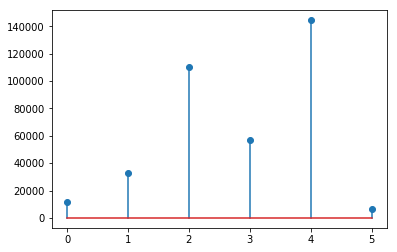

In [17]:
all_crimes = data_d[data_d.columns[1]].values
c_count_d = np.zeros(6)
for i in range(len(all_crimes)):
    # Mappping crime type to a numerical representation
    all_crimes[i] = transform(all_crimes[i])
    # Counting the total number of that crime_type present in data
    c_count_d[all_crimes[i]-1] = c_count_d[all_crimes[i]-1] + 1
graph_b(c_count_d)
data_d['Crime_Type'] = all_crimes
data_d = data_d.drop([data_d.columns[1]], axis=1)
# Showing graph corresponding to teh count of every crime type in Denver dataset
show_details(data_d,0)

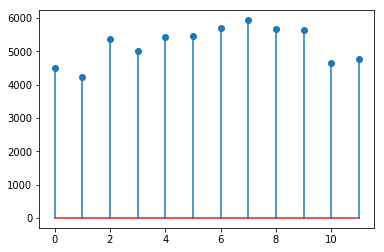

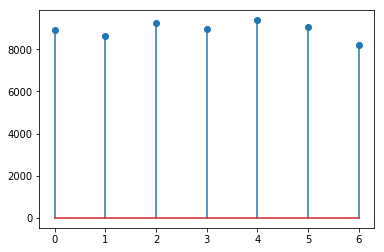

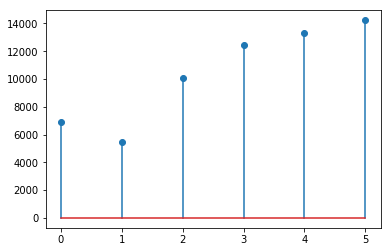

,INCIDENT_ID,NEIGHBORHOOD_ID,IS_CRIME,Crime_Type,Crime_Month,Crime_Day,Crime_Time,Crime_Year
0,2016376978,montbello,1,3,6,3,6,2016
1,20186000994,gateway-green-valley-ranch,1,5,10,3,3,2017
2,20166003953,wellshire,1,5,3,5,5,2016
3,201872333,belcaro,1,5,1,2,5,2018
4,2017411405,cherry-creek,1,5,6,4,5,2017


In [18]:
# Finding month, hour, day count in dataset for dataset to analyze what is unsafe time period for staying out
months = []
days = []
hours = []
years_d = []
d_count_d = np.zeros(num_days)
m_count_d = np.zeros(num_months)
h_count_d = np.zeros(num_time_range)
date = data_d[data_d.columns[1]].values
for i in range(len(date)):
    x = date[i]
    x = str(x)
    month, day, year , hour , minutes , seconds , f = convert(x)  
    years_d.append(year)
    ans = datetime.date(year, month, day)
    months.append(month)
    t = ans.weekday()
    days.append(t+1)
    j = conversion(hour,f)
    hours.append(j)
    if(year==2014):
        m_count_d[month-1] = m_count_d[month-1]+1
        d_count_d[t] = d_count_d[t]+1
        h_count_d[j-1] = h_count_d[j-1] + 1
graph_b(m_count_d)
graph_b(d_count_d)
graph_b(h_count_d)
data_d['Crime_Month'] = months
data_d['Crime_Day'] = days
data_d['Crime_Time'] = hours
data_d['Crime_Year'] = years_d
data_d = data_d.drop([data_d.columns[1]], axis=1)
show_details(data_d,0)
data_d.head()

In [19]:
# Loading Demographics Dataset which includes information about neighbourhood areas of denver
demographics = pd.read_csv('demographic.csv')
show_details(demographics,0)

In [20]:
current = demographics[[demographics.columns[0], demographics.columns[1]]]
current = current.sort_values(by=[current.columns[0]])
n_ref = current[current.columns[1]].values
for i in range(len(n_ref)):
    x = n_ref[i]
    x = str(x)
    x = x.lower()
    y = ""
    f = 1
    for j in range(len(x)):
        if(x[j]=='/' and x[j+1]==' '):
            f=0  
        elif(x[j]==' ' and f==1):
            y = y + '-'
            f = 0
        elif(x[j]==' ' and f==0):
            continue
        elif(x[j]=='-'):
            continue
        else:
            y = y + x[j]
            f = 1
    n_ref[i] = y
show_details(current,0)

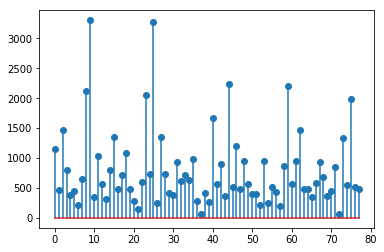

In [21]:
ans = []
n_count_d = np.zeros(78)
neighbours = data_d[data_d.columns[1]].values
for i in range(len(neighbours)):
    x = neighbours[i]
    x = str(x)
    for j in range(len(n_ref)):
        if(x==n_ref[j]):
            ans.append(j+1)
            if(years_d[i]==2014):
                n_count_d[j] = n_count_d[j] + 1
            break
data_d['Crime_Location'] = ans
data_d = data_d.drop(data_d.columns[1],axis=1)
graph_b(n_count_d)
show_details(data_d,0)

In [22]:
data = pd.read_csv('los_angeles.csv')
show_details(data,0)

In [23]:
data_la = data[[data.columns[0], data.columns[2], data.columns[3], data.columns[4], data.columns[8]]]
show_details(data_la,0)

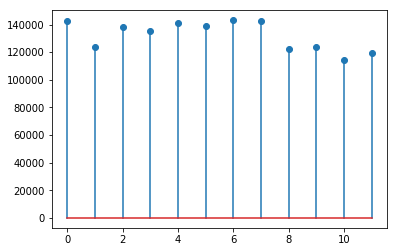

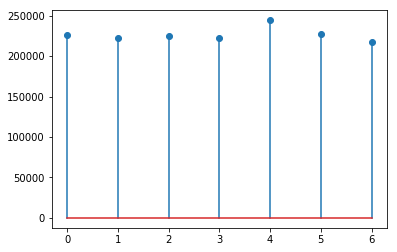

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [24]:
months = []
days = []
years = []
d_count_la = np.zeros(num_days)
m_count_la = np.zeros(num_months)
date = data_la[data_la.columns[1]].values
for i in range(len(date)):
    x = date[i]
    x = str(x)
    month, day, year = (int(t) for t in x.split('/'))  
    years.append(year)
    ans = datetime.date(year, month, day)
    months.append(month)
    t = ans.weekday()
    days.append(t+1)
    m_count_la[month-1] = m_count_la[month-1]+1
    d_count_la[t] = d_count_la[t]+1
graph_b(m_count_la)
graph_b(d_count_la)
data_la['Crime_Month'] = months
data_la['Crime_Day'] = days
data_la['Crime_Year'] = years
data_la = data_la.drop([data_la.columns[1]], axis=1)
show_details(data_la,0)

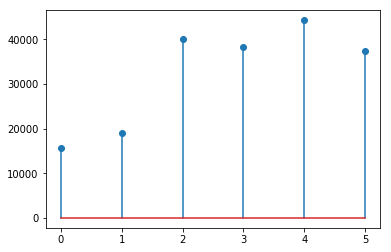

In [25]:
hours = []
h_count_la = np.zeros(num_time_range)
times = data_la[data_la.columns[1]].values
for i in range(len(times)):
    x = times[i]
    x = int(x)
    x = int(x/100)
    t = conv(x)
    hours.append(t)
    if(years[i]==2014):
        h_count_la[t-1] = h_count_la[t-1] + 1
graph_b(h_count_la)
data_la['Crime_Time'] = hours
data_la = data_la.drop([data_la.columns[1]],axis=1)
show_details(data_la,0)

In [26]:
crime_categories = pd.unique(data[data.columns[8]].values.ravel())
crime_categories
final_cc = []
for i in range(len(crime_categories)):
    x = str(crime_categories[i])
    y = ""
    for j in range(len(x)):
        if(x[j]=='-' or x[j]=='/' or x[j]=='(' or x[j]==',' or x[j]==')'):
            y = y + ' ' 
        else:
            y = y + x[j]
    if(y[len(y)-1]==' '):
        y =y[:-1]
    final_cc.append(y)
final_cc = set(final_cc)
final_cc = [x.lower() for x in final_cc]
show_details(final_cc,1)

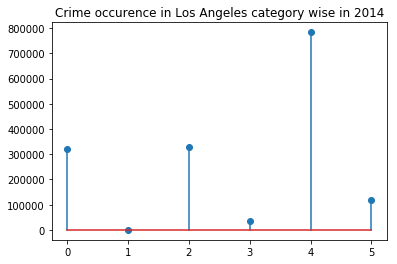

In [27]:
all_crimes = data_la[data_la.columns[2]].values
ans = []
c_count_la = np.zeros(6)
for i in range(len(all_crimes)):
    y = transform(all_crimes[i])
    ans.append(y)
    c_count_la[y-1] = c_count_la[y-1] + 1
data_la['Crime_Type'] = ans
data_la = data_la.drop(data_la.columns[2],axis=1)
plt.title('Crime occurence in Los Angeles category wise in 2014')
graph_b(c_count_la)
show_details(data_la,0)

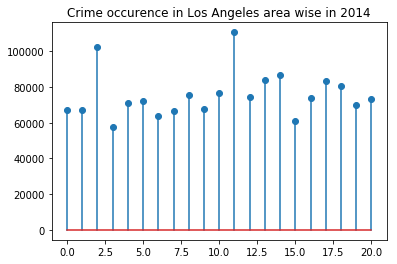

In [28]:
neigh = data_la[data_la.columns[1]].values
n_count_la = np.zeros(21)
for i in range(len(neigh)):
    n_count_la[neigh[i]-1] = n_count_la[neigh[i]-1] + 1
plt.title('Crime occurence in Los Angeles area wise in 2014')
graph_b(n_count_la)

In [29]:
n_count_d = percentage(n_count_d)
n_count_la = percentage(n_count_la)
h_count_d = percentage(h_count_d)
h_count_la = percentage(h_count_la)
d_count_d = percentage(d_count_d)
d_count_la = percentage(d_count_la)
m_count_d = percentage(m_count_d)
m_count_la = percentage(m_count_la)

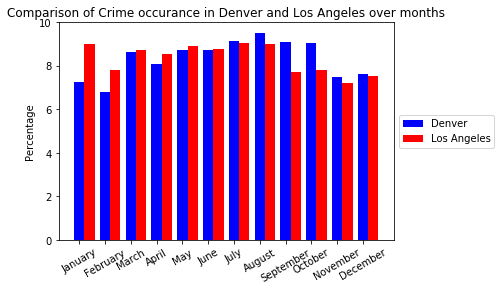

In [30]:
bar_width = 4
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.bar((np.arange(len(m_count_d))*10),m_count_d,bar_width,color='blue',label='Denver')
plt.xticks(np.arange(len(m_count_d))*10, months, fontsize=10, rotation=30)
plt.bar((np.arange(len(m_count_la))*10)+bar_width,m_count_la,bar_width,color='red',label='Los Angeles')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Comparison of Crime occurance in Denver and Los Angeles over months')
graph_a(1)

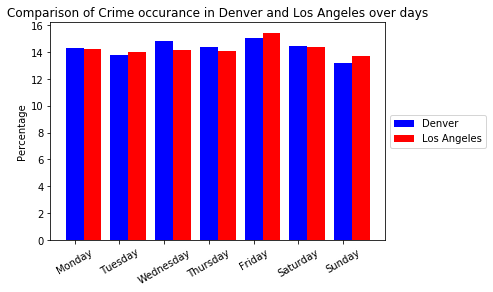

In [31]:
bar_width = 4
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.bar((np.arange(len(d_count_d))*10),d_count_d,bar_width,color='blue',label='Denver')
plt.xticks(np.arange(len(d_count_d))*10,days, fontsize=10, rotation=30)
plt.bar((np.arange(len(d_count_la))*10)+bar_width,d_count_la,bar_width,color='red',label='Los Angeles')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Comparison of Crime occurance in Denver and Los Angeles over days')
graph_a(1)

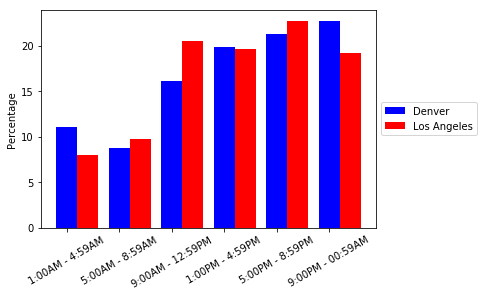

In [32]:
bar_width = 4
days = ['1:00AM - 4:59AM','5:00AM - 8:59AM','9:00AM - 12:59PM','1:00PM - 4:59PM','5:00PM - 8:59PM','9:00PM - 00:59AM']
plt.bar((np.arange(len(h_count_d))*10),h_count_d,bar_width,color='blue',label='Denver')
plt.bar(np.arange(len(h_count_la))*10+bar_width, h_count_la, bar_width, color='red' ,label='Los Angeles')
plt.xticks(np.arange(len(h_count_d))*10,days, fontsize=10, rotation=30)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
graph_a(1)

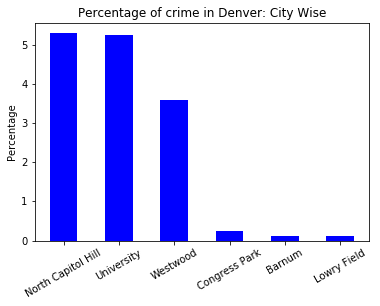

In [33]:
n_count_t , index_t = find_three(n_count_d,0)
n_count_l , index_l = find_three(n_count_d,1)
n_count_l.reverse()
index_l.reverse()
n_count_t = n_count_t + n_count_l
index_t = index_t + index_l
bar_width = 0.5
current = demographics[[demographics.columns[0], demographics.columns[1]]]
current = current.sort_values(by=[current.columns[0]])
cities = []
for i in range(len(index_t)):
    cities.append(current[current.columns[1]][index_t[i]])
plt.bar((np.arange(len(n_count_t))*1),n_count_t,bar_width,color='blue')
plt.xticks(np.arange(len(n_count_t))*1, cities, fontsize=10, rotation=30)
plt.title('Percentage of crime in Denver: City Wise')
graph_a(1)

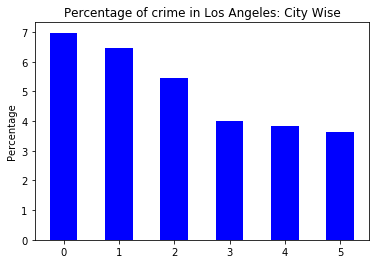

In [34]:
n_count_t , index_t = find_three(n_count_la,0)
n_count_l , index_l = find_three(n_count_la,1)
n_count_l.reverse()
index_l.reverse()
n_count_t = n_count_t + n_count_l
index_t = index_t + index_l
bar_width = 0.5
plt.bar((np.arange(len(n_count_t))*1),n_count_t,bar_width,color='blue')
plt.title('Percentage of crime in Los Angeles: City Wise')
graph_a(1)

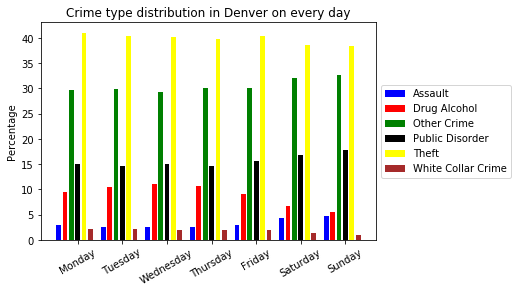

In [35]:
def find_type_prob(a,b):
    for i in range(b):
        s = 0
        for j in range(6):
            s = s + a[i][j]
        for j in range(6):
            a[i][j] = a[i][j] / s
    return a

day_d = data_d[data_d.columns[4]].values
type_d = data_d[data_d.columns[2]].values
day_type_d = np.zeros((7,6))
for i in range(len(day_d)):
    b = day_d[i] - 1
    a = type_d[i] - 1
    day_type_d[b][a] = day_type_d[b][a] + 1
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.title('Crime type distribution in Denver on every day')
type_graph(day_type_d,7,days)

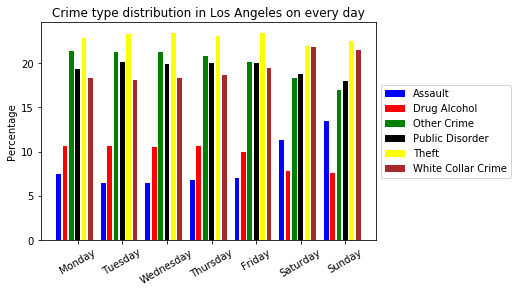

In [36]:
day_la = data_la[data_la.columns[3]].values
type_la = data_la[data_la.columns[5]].values
day_type_la = np.zeros((7,6))
for i in range(len(day_la)):
    b = day_la[i] - 1
    a = type_la[i] - 1
    day_type_la[b][a] = day_type_la[b][a] + 1
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.title('Crime type distribution in Los Angeles on every day')
type_graph(day_type_la,7,days)

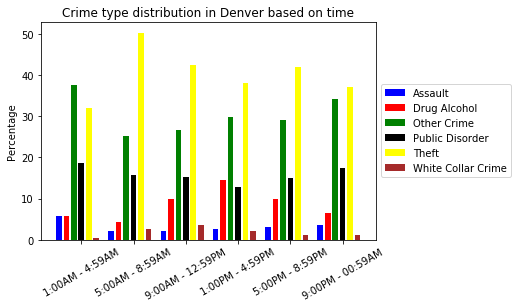

In [37]:
time_d = data_d[data_d.columns[5]].values
time_type_d = np.zeros((6,6))
for i in range(len(time_d)):
    b = time_d[i] - 1
    a = type_d[i] - 1
    time_type_d[b][a] = time_type_d[b][a] + 1    
a = ['1:00AM - 4:59AM','5:00AM - 8:59AM','9:00AM - 12:59PM','1:00PM - 4:59PM','5:00PM - 8:59PM','9:00PM - 00:59AM']
plt.title('Crime type distribution in Denver based on time')
type_graph(time_type_d,6,a)

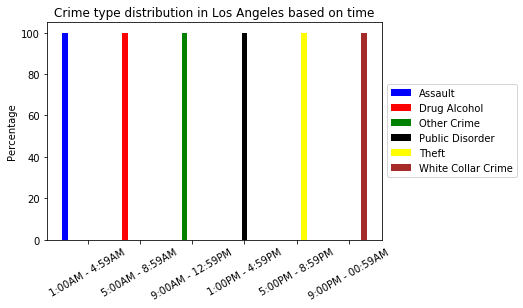

In [38]:
time_la = data_la[data_la.columns[5]].values
time_type_la = np.zeros((6,6))
for i in range(len(time_la)):
    b = time_la[i] - 1
    a = type_la[i] - 1
    time_type_la[b][a] = time_type_la[b][a] + 1    
a = ['1:00AM - 4:59AM','5:00AM - 8:59AM','9:00AM - 12:59PM','1:00PM - 4:59PM','5:00PM - 8:59PM','9:00PM - 00:59AM']
plt.title('Crime type distribution in Los Angeles based on time')
type_graph(time_type_la,6,a)

In [39]:
set1 = data_d.iloc[0:72463]
set2 = data_d.iloc[72463:144926]
set3 = data_d.iloc[144926:217389]
set4 = data_d.iloc[217389:289852]
set5 = data_d.iloc[289852:]

x = set1[set1.columns[6]].values
for i in range(len(x)):
    tr = x[i] - 2013
    x[i] = tr
x = set2[set1.columns[6]].values
for i in range(len(x)):
    tr = x[i] - 2013
    x[i] = tr
x = set3[set1.columns[6]].values
for i in range(len(x)):
    tr = x[i] - 2013
    x[i] = tr
x = set4[set1.columns[6]].values
for i in range(len(x)):
    tr = x[i] - 2013
    x[i] = tr
x = set5[set1.columns[6]].values
for i in range(len(x)):
    tr = x[i] - 2013
    x[i] = tr

In [40]:
def bayesian_formula(a,b,c):
    for i in range(6):
        for j in range(c):
            a[i][j] = a[i][j] * b[i]
    return a

def type_prob(a,b):
    for i in range(6):
        s = 0
        for j in range(b):
            s = s + a[i][j]
        for j in range(b):
            a[i][j] = a[i][j] / s
    return a

def find_matrix(a,b,c,d):
    t = np.zeros((d,6))
    for i in range(len(a)):
        t[a[i]-1][b[i]-1] = t[a[i]-1][b[i]-1] + 1
    t = np.transpose(t)
    t = type_prob(t,d)
    t = bayesian_formula(t,c,d)
    return t

def prob(a):
    s = 0
    for i in range(len(a)):
        s = s+a[i]
    for i in range(len(a)):
        a[i] = a[i]/s
    return a

def count(a,b):
    ty = np.zeros(b)
    for i in range(len(a)):
        ty[int(a[i])-1] = ty[int(a[i])-1] + 1
    return ty

def correlation_coefficient(a,b):
    s = 0
    s_a = 0
    s_b = 0
    t_a = 0
    t_b = 0
    for i in range(len(a)):
        s = s + a[i]*b[i]
        s_a = s_a + a[i]
        s_b = s_b + b[i]
        t_a = t_a + (a[i]*a[i])
        t_b = t_b + (b[i]*b[i])
    num = s*len(a) - (s_a*s_b) 
    g = t_a*len(a) - s_a*s_a
    h = t_b*len(b) - s_b*s_b
    den = math.sqrt(g) * math.sqrt(h)
    return round(num/den,2)

def find_ans(train_d,test_d):
    
    train_m_d = train_d[train_d.columns[3]].values
    train_n_d = train_d[train_d.columns[7]].values
    train_c_d = train_d[train_d.columns[2]].values
    train_d_d = train_d[train_d.columns[4]].values
    train_t_d = train_d[train_d.columns[5]].values
    train_y_d = train_d[train_d.columns[6]].values
    test_m_d = test_d[test_d.columns[3]].values
    test_n_d = test_d[test_d.columns[7]].values
    test_c_d = test_d[test_d.columns[2]].values
    test_d_d = test_d[test_d.columns[4]].values
    test_t_d = test_d[test_d.columns[5]].values
    test_y_d = test_d[test_d.columns[6]].values
        
    prob_m_d = prob(count(train_m_d,12))
    prob_n_d = prob(count(train_n_d,78))
    prob_c_d = prob(count(train_c_d,6))
    prob_d_d = prob(count(train_d_d,7))
    prob_t_d = prob(count(train_t_d,6))
    prob_y_d = prob(count(train_y_d,6))
    
    month_type_d = find_matrix(train_m_d,train_c_d,prob_c_d,12)
    day_type_d = find_matrix(train_d_d,train_c_d,prob_c_d,7)
    time_type_d = find_matrix(train_t_d,train_c_d,prob_c_d,6)
    n_type_d = find_matrix(train_n_d,train_c_d,prob_c_d,78)
    y_type_d = find_matrix(train_y_d,train_c_d,prob_y_d,6)
    
    c_m = correlation_coefficient(train_m_d,train_c_d)
    c_n = correlation_coefficient(train_n_d,train_c_d)
    c_t = correlation_coefficient(train_t_d,train_c_d)
    c_d = correlation_coefficient(train_d_d,train_c_d)
    c_y = correlation_coefficient(train_y_d,train_c_d)
    
    c = np.zeros(6)
    test_results = []
    for i in range(len(test_m_d)):
        maxi = 0
        for j in range(6):
            k = month_type_d[j][test_m_d[i]-1]*time_type_d[j][test_t_d[i]-1]*day_type_d[j][test_d_d[i]-1]*n_type_d[j][test_n_d[i]-1]
            if(maxi<k):
                maxi = k
                ans = j+1
        test_results.append(ans)
        c[ans-1] = c[ans-1] + 1

    correct=0
    for i in range(len(test_results)):
        if(test_c_d[i]==test_results[i]):
            correct = correct + 1
    
    acc = correct/len(test_results)
    
    y = np.zeros((6,6))
    for i in range(len(test_c_d)):
        y[test_c_d[i]-1][test_results[i]-1] = y[test_c_d[i]-1][test_results[i]-1] + 1
        
    return round(acc,2)

In [41]:
def inbuilt1(train_d,test_d):
    x_in = train_d.iloc[:,3:].as_matrix(columns=None)
    y_in = train_d.iloc[:,2].values
    y_in = y_in.astype('int')
    x_out = test_d.iloc[:,3:].as_matrix(columns=None)
    y_out = test_d.iloc[:,2].values
    y_out = y_out.astype('int')
    
    clf = MultinomialNB()
    clf.fit(x_in,y_in)
    t = clf.predict(x_out)

    c =0 
    for i in range(len(t)):
        if(t[i]==y_out[i]):
            c = c + 1

    return round(c/len(t),2)

def inbuilt2(train_d,test_d):
    x_in = train_d.iloc[:,3:].as_matrix(columns=None)
    y_in = train_d.iloc[:,2].values
    y_in = y_in.astype('int')
    x_out = test_d.iloc[:,3:].as_matrix(columns=None)
    y_out = test_d.iloc[:,2].values
    y_out = y_out.astype('int')
    
    clf = GaussianNB()
    clf.fit(x_in,y_in)
    t = clf.predict(x_out)

    c =0 
    for i in range(len(t)):
        if(t[i]==y_out[i]):
            c = c + 1

    return round(c/len(t),2)

def inbuilt3(train_d,test_d):
    x_in = train_d.iloc[:,3:].as_matrix(columns=None)
    y_in = train_d.iloc[:,2].values
    y_in = y_in.astype('int')
    x_out = test_d.iloc[:,3:].as_matrix(columns=None)
    y_out = test_d.iloc[:,2].values
    y_out = y_out.astype('int')
    
    clf = BernoulliNB()
    clf.fit(x_in,y_in)
    t = clf.predict(x_out)

    c =0 
    for i in range(len(t)):
        if(t[i]==y_out[i]):
            c = c + 1

    return round(c/len(t),2)

In [42]:
ans = []
inbuilt1_ans = []
inbuilt2_ans = []
inbuilt3_ans = []

train_d = pd.concat([set1 , set2 , set3 ,set4])
test_d = set5
ans.append(find_ans(train_d,test_d))
inbuilt1_ans.append(inbuilt1(train_d,test_d))
inbuilt2_ans.append(inbuilt2(train_d,test_d))
inbuilt3_ans.append(inbuilt3(train_d,test_d))

train_d = pd.concat([set5 , set2 , set3 ,set4])
test_d = set1
ans.append(find_ans(train_d,test_d))
inbuilt1_ans.append(inbuilt1(train_d,test_d))
inbuilt2_ans.append(inbuilt2(train_d,test_d))
inbuilt3_ans.append(inbuilt3(train_d,test_d))

train_d = pd.concat([set1 , set5 , set3 ,set4])
test_d = set2
ans.append(find_ans(train_d,test_d))
inbuilt1_ans.append(inbuilt1(train_d,test_d))
inbuilt2_ans.append(inbuilt2(train_d,test_d))
inbuilt3_ans.append(inbuilt3(train_d,test_d))

train_d = pd.concat([set1 , set2 , set5 ,set4])
test_d = set3
ans.append(find_ans(train_d,test_d))
inbuilt1_ans.append(inbuilt1(train_d,test_d))
inbuilt2_ans.append(inbuilt2(train_d,test_d))
inbuilt3_ans.append(inbuilt3(train_d,test_d))

train_d = pd.concat([set1 , set2 , set3 ,set5])
test_d = set4
ans.append(find_ans(train_d,test_d))
inbuilt1_ans.append(inbuilt1(train_d,test_d))
inbuilt2_ans.append(inbuilt2(train_d,test_d))
inbuilt3_ans.append(inbuilt3(train_d,test_d))

ans , inbuilt1_ans , inbuilt2_ans , inbuilt3_ans

([0.42, 0.43, 0.41, 0.41, 0.41],
 [0.34, 0.37, 0.35, 0.35, 0.35],
 [0.41, 0.41, 0.39, 0.4, 0.4],
 [0.4, 0.41, 0.39, 0.39, 0.39])

In [43]:
def find_mean(a):
    s = 0
    for i in range(len(a)):
        s = s+a[i]
    return round(s / len(a),2)

print( find_mean(ans) )
print( find_mean(inbuilt1_ans) )
print( find_mean(inbuilt2_ans) )
print( find_mean(inbuilt3_ans) )

0.42
0.35
0.4
0.4


[[ 1804.  6007. 19622. 10536. 23382.  1070.]
 [ 2065.  6186. 20243. 10500. 25728.  1310.]
 [ 2205.  6083. 21187. 10627. 26333.  1183.]
 [ 2159.  5671. 22116. 10181. 27452.  1262.]
 [ 1679.  4335. 15145.  6359. 18817.   827.]
 [ 1657.  4468. 12195.  8440. 22679.   802.]]


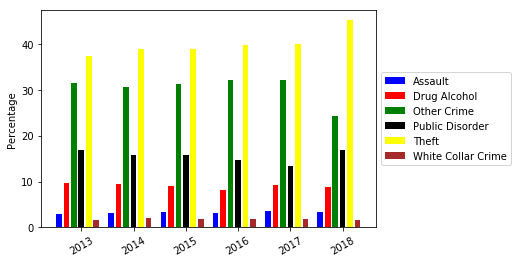

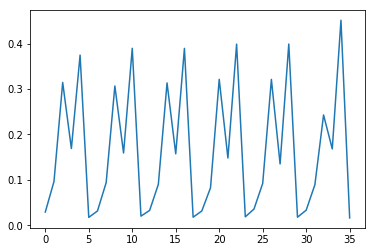

In [43]:
years = data_d[data_d.columns[6]].values
category = data_d[data_d.columns[2]].values

a = np.zeros((6,6))

for i in range(len(years)):
    a[years[i]-1][category[i]-1] = a[years[i]-1][category[i]-1] + 1
print(a)
type_graph(a,6,['2013','2014','2015','2016','2017','2018'])
plt.plot(a.flatten())
plt.show()

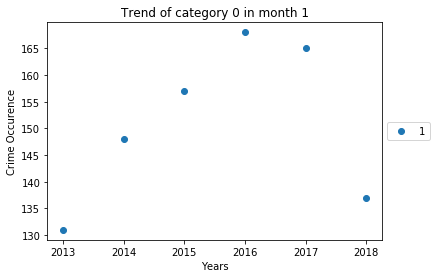

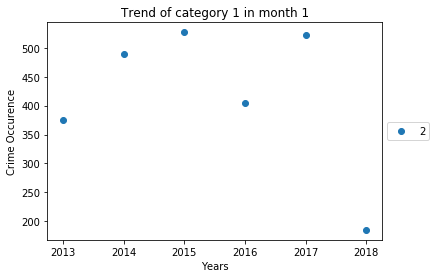

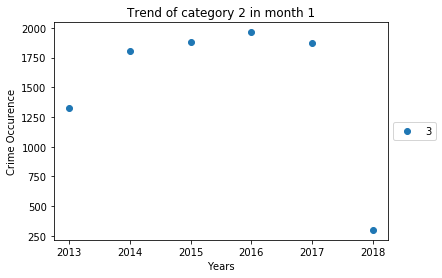

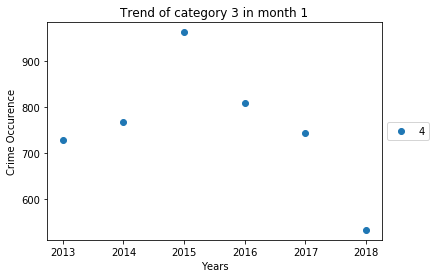

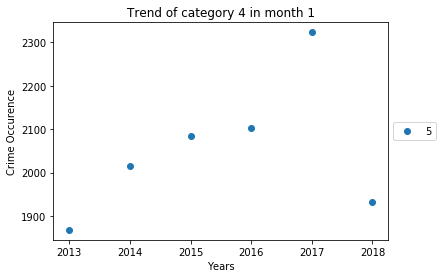

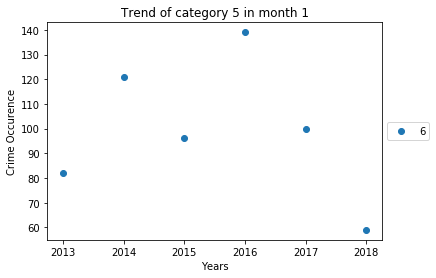

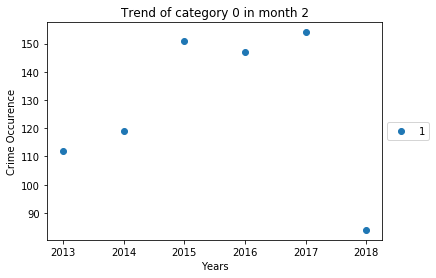

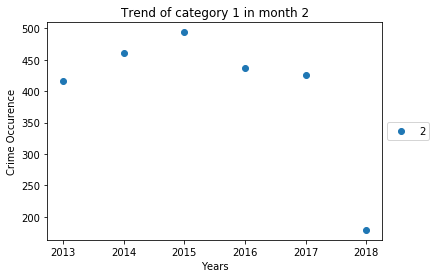

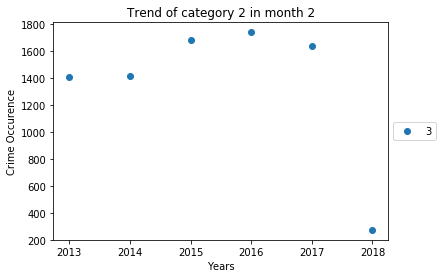

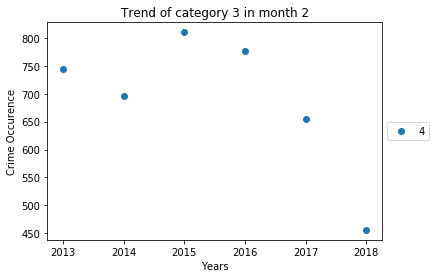

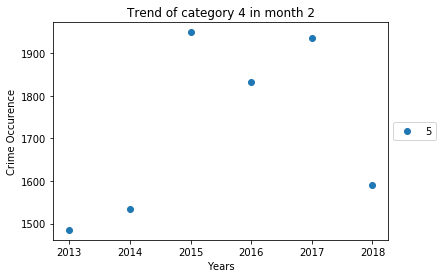

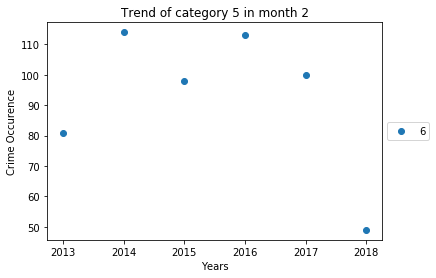

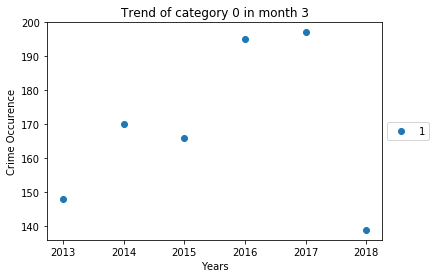

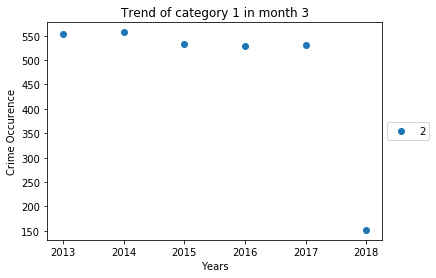

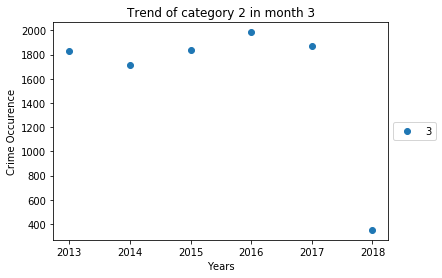

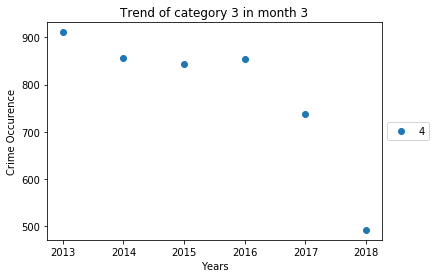

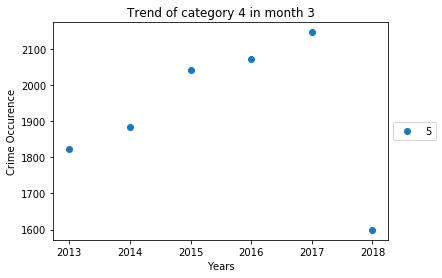

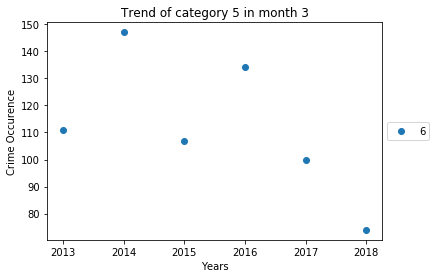

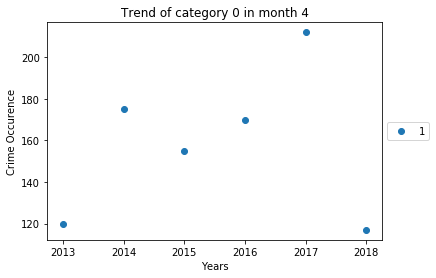

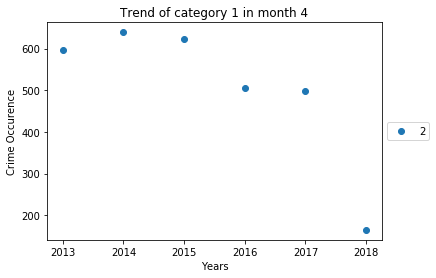

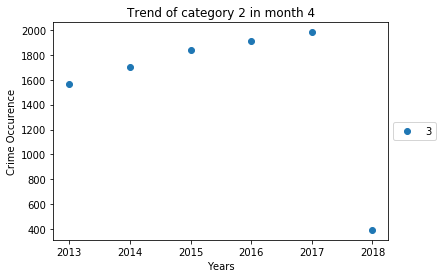

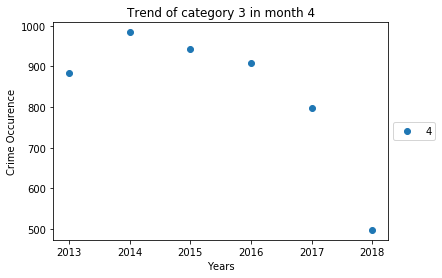

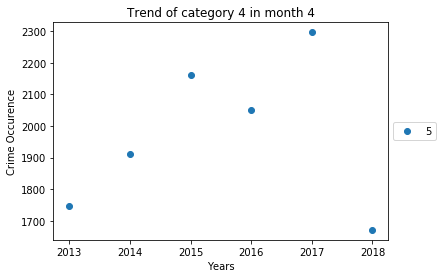

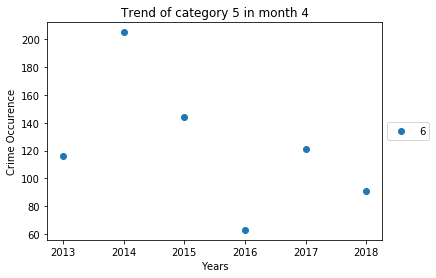

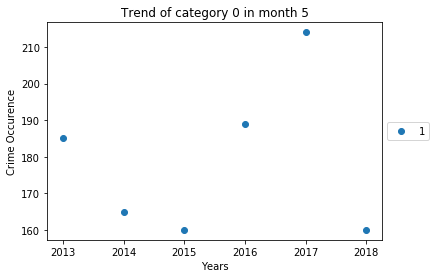

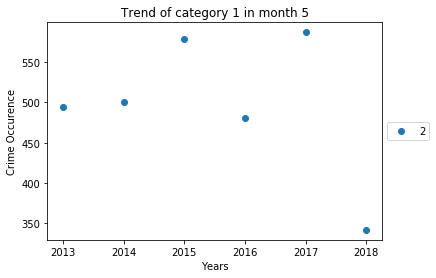

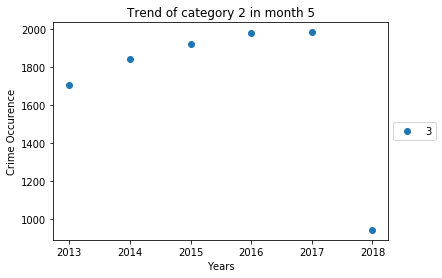

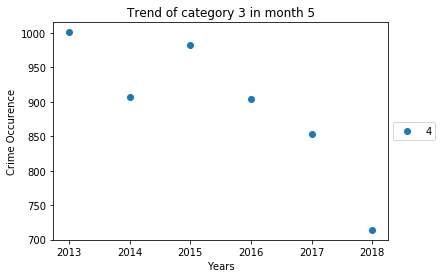

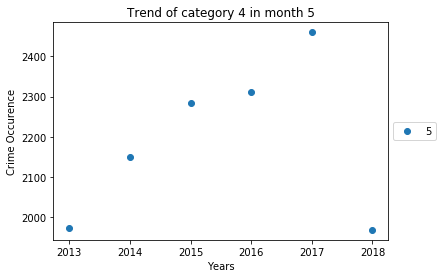

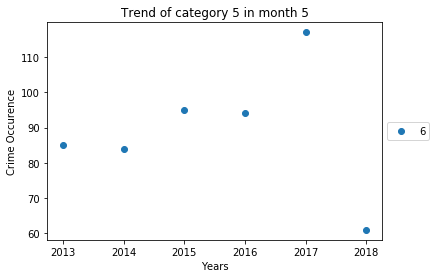

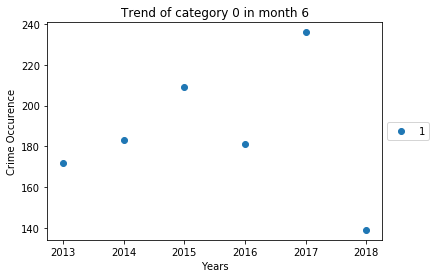

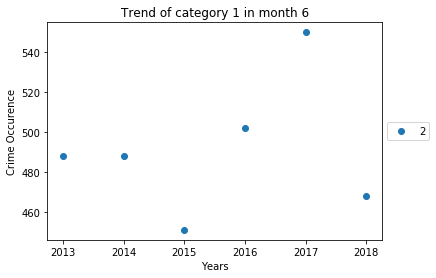

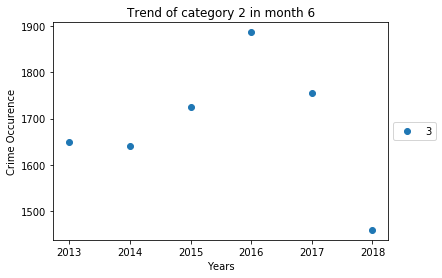

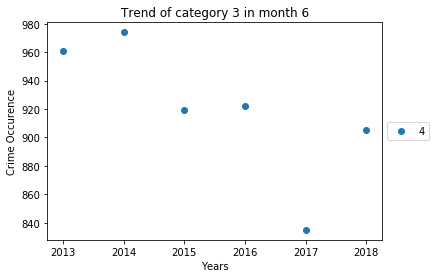

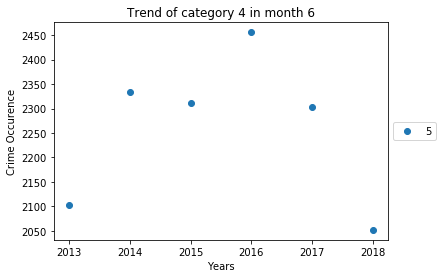

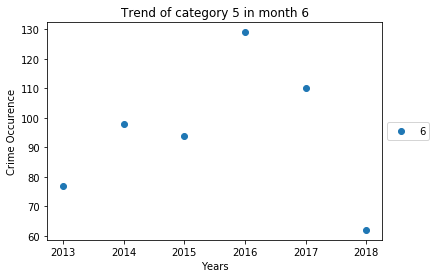

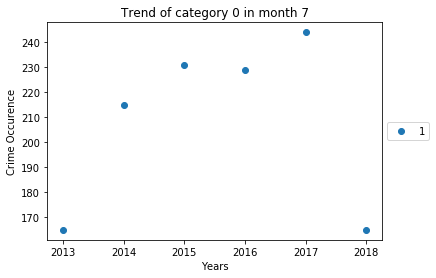

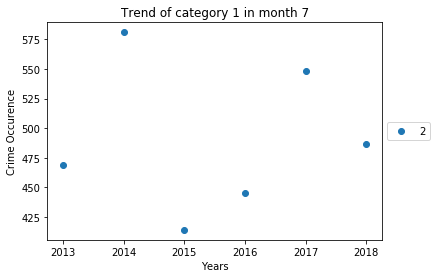

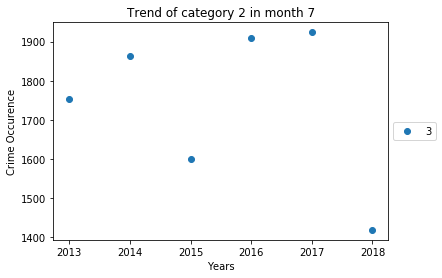

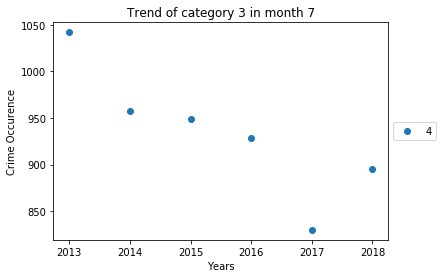

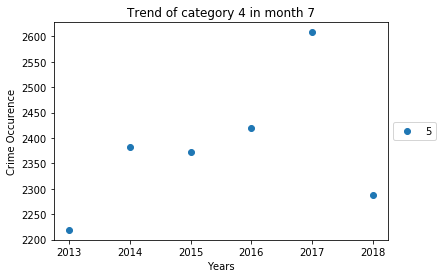

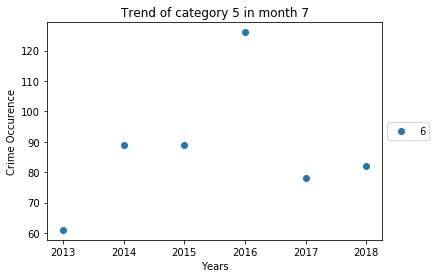

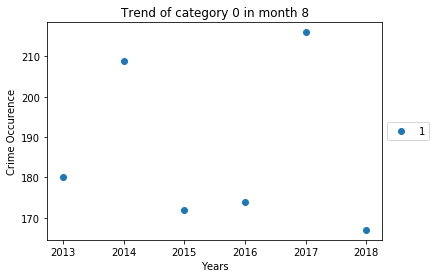

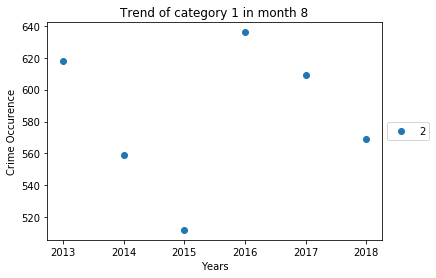

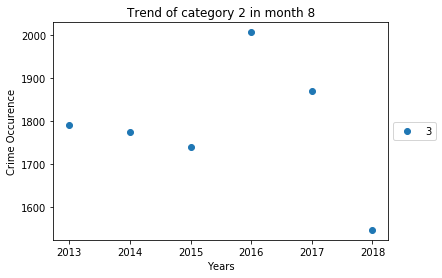

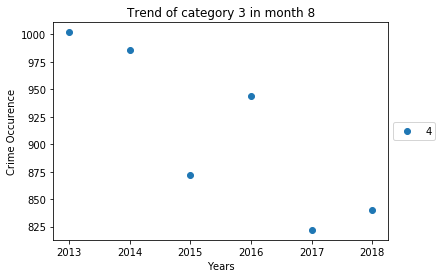

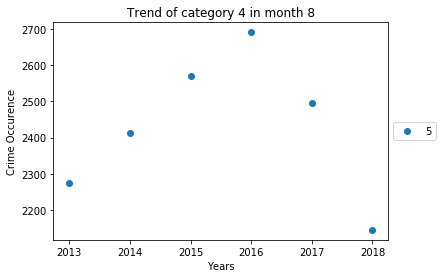

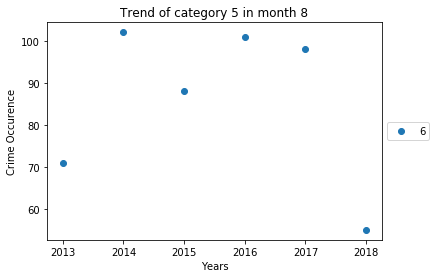

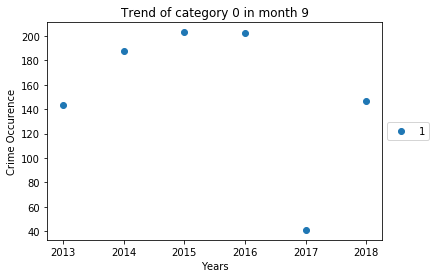

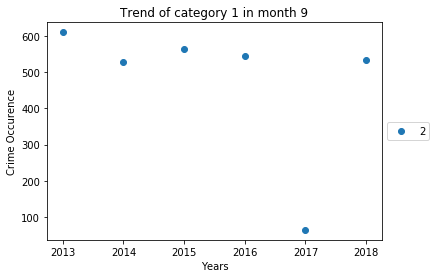

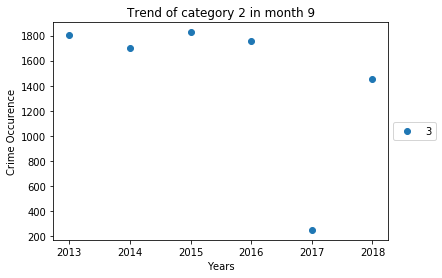

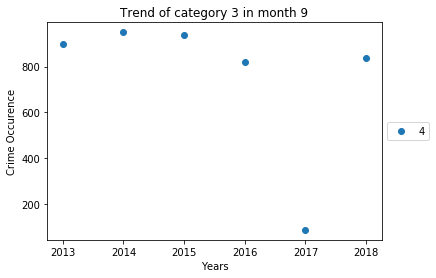

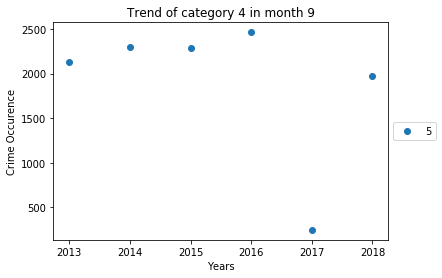

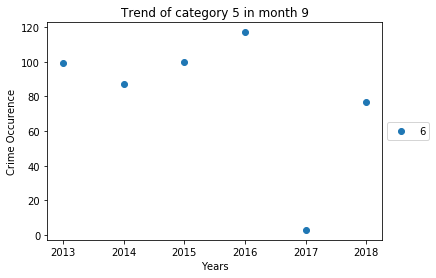

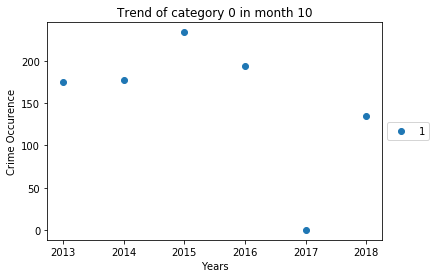

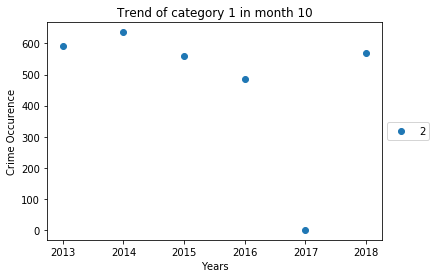

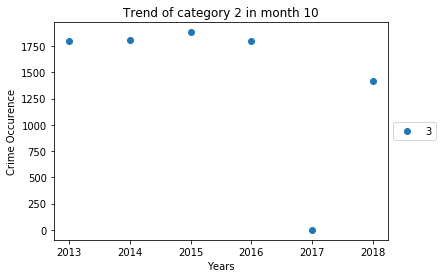

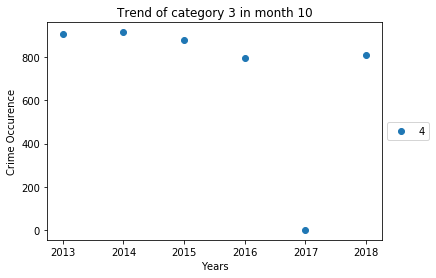

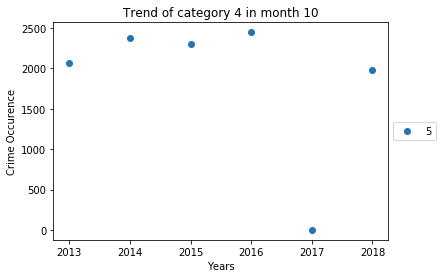

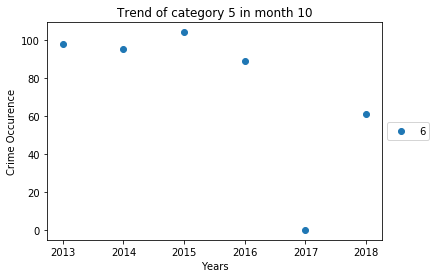

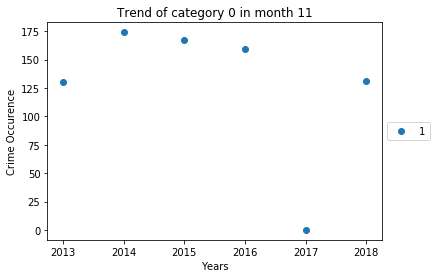

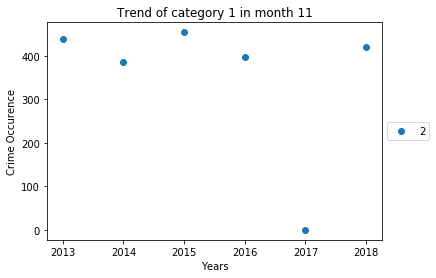

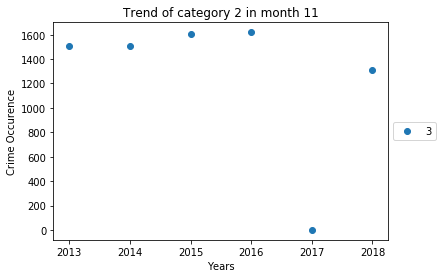

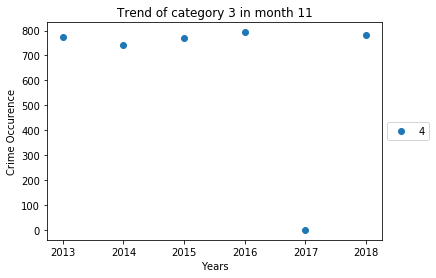

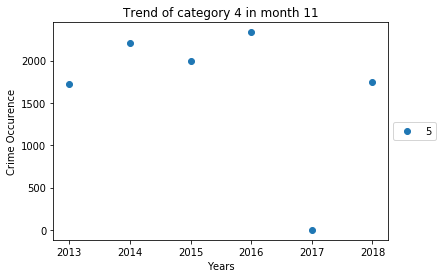

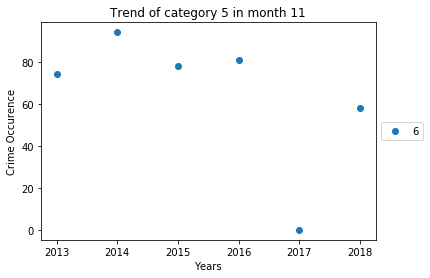

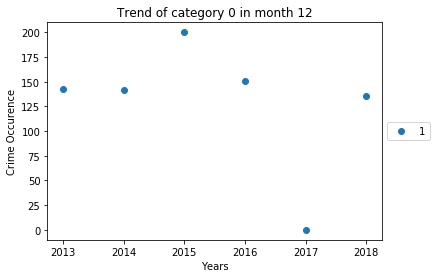

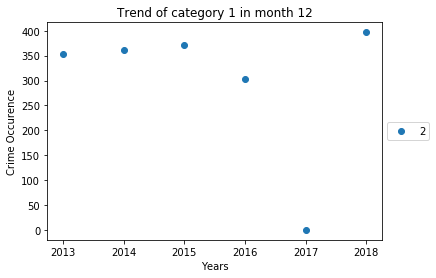

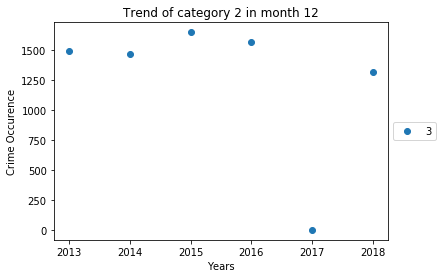

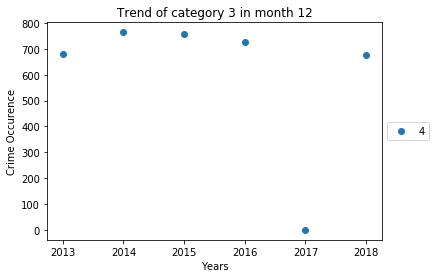

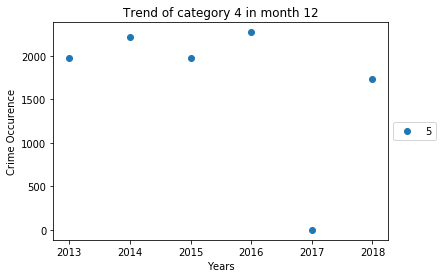

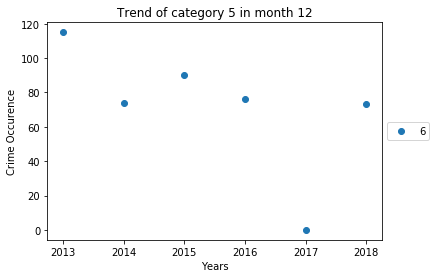

In [44]:
months = data_d[data_d.columns[3]].values
categories = ['1','2','3','4','5','6']
x = [2013,2014,2015,2016,2017,2018]
b = np.zeros((12,6,6))
for j in range(12):
    for i in range(len(months)):
        if(months[i]==j+1):
            b[j][category[i]-1][years[i]-1] = b[j][category[i]-1][years[i]-1] + 1
    for i in range(6):
        plt.scatter(x,b[j][i],label=categories[i])
        plt.xlabel('Years')
        plt.ylabel('Crime Occurence')
        plt.title('Trend of category ' + str(i) + ' in month ' + str(j+1))
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()

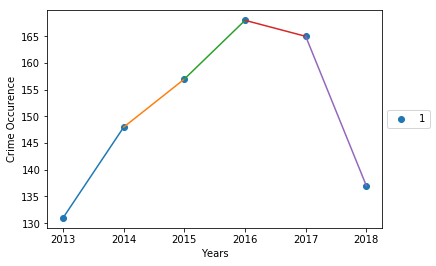

y = 2.63x -5143.14


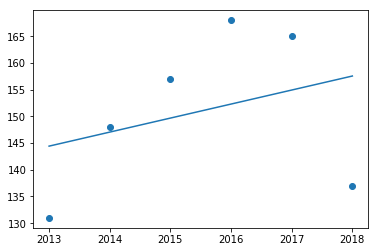

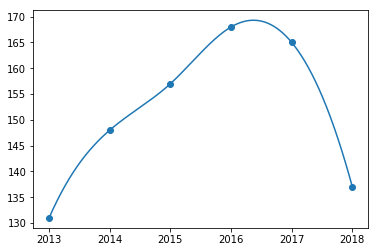

In [45]:
plt.scatter(x,b[0][0],label=categories[0])
plt.xlabel('Years')
plt.ylabel('Crime Occurence')
# plt.title('Trend of category ' + str(i) + ' in month ' + str(j+1))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

x = [2013,2014,2015,2016,2017,2018]
y = [j for j in b[0][0]]

def linear_lagrange(a,x):
    y = a[1]*(x - a[2])/(a[0] - a[2]) + a[3]*(x - a[0])/(a[2] - a[0])
    return y

def segments(x,y,i,j):
    a = [x[i],y[i],x[j],y[j]]
    j = np.arange(a[0],a[2],0.00001)
    y = linear_lagrange(a,j)
    plt.plot(j,y)

segments(x,y,0,1)
segments(x,y,1,2)
segments(x,y,2,3)
segments(x,y,3,4)
segments(x,y,4,5)

plt.show()

# Linear Model
# y = beta_0 + beta_1 * x

def linear_curve_fitting(x,y):
    
    mean_x = find_mean(x)
    mean_y = find_mean(y)
    
    xy = []
    for i in range(len(x)):
        xy.append(x[i]*y[i])
    mean_xy = find_mean(xy)
    
    j = [i**2 for i in x]
    mean_x_2 = find_mean(j)

    m = (mean_x*mean_y - mean_xy) / (mean_x**2 - mean_x_2)
    c = mean_y - m*mean_x
    
    y_pred = [(c + (m * j)) for j in x]
    plt.scatter(x,y)
    plt.plot(x,y_pred)
    plt.plot()
    
    if(c>0):
        print('y = ' + str(round(m,2)) + 'x + ' + str(round(c,2)) )
    else:
        print('y = ' + str(round(m,2)) + 'x ' + str(round(c,2)) )
    
linear_curve_fitting(x,y)
plt.show()

# Cubic Spline Model
# Only used for interpolation and not extrapolation
cs = CubicSpline(x,y)
t = np.arange(x[0],x[len(x)-1],0.0001)
plt.scatter(x,y)
plt.plot(t,cs(t))
plt.show()

In [ ]:
window_size = 12
t = c.flatten()
s = 0
for i in range(window_size):
    s = s + t[i]
values = []
values.append(s/window_size)
for i in range(window_size,len(t)):
    s = s + t[i] - t[i-window_size]
    values.append(s/window_size)
plt.plot(values)
plt.show()

In [46]:
end_time = time()
print(round(end_time - start_time,2))

152.29
